In [1]:
import numpy as np
import pandas as pd
import matplotlib.

NameError: name 'pd' is not defined

In [ ]:
# READING THE DATASET
df = pd.read_csv('imdb_top_1000.csv')
df.head()

In [79]:
# Creating a copy of the dataset
data = df.copy()

In [80]:
# Finding out the row and column
print("Number of rows in the data:", df.shape[0])
print("Number of columns in the data:", df.shape[1])

Number of rows in the data: 1000
Number of columns in the data: 16


In [81]:
# To get Info (columns name, dtypes, etc) about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


# **ISSUES WE NOTICE:**
* Meta_sscore, certificate and gross contains NA
* Gross has incorrect dtype
* Runtime contains 'min'
* Removing the unnecessary info
* Columns may contains garbage value
* Checking for outliers

In [82]:
# To generate descriptive Satistic
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [83]:
# Number of NULLs
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

# **Dealing with NULL Values**

In [84]:
# Most frequent values
mfv_gross = df['Gross'].value_counts().idxmax()
mfv_certificate = df['Certificate'].value_counts().idxmax()
mfv_metascore = df['Meta_score'].value_counts().idxmax()

In [85]:
# Replace the mode value with our missing values
df['Gross'].replace(np.nan, mfv_gross, inplace =True)
df['Meta_score'].replace(np.nan, mfv_metascore, inplace=True)
df['Certificate'].replace(np.nan, mfv_certificate, inplace=True)

In [86]:
# Checking for NULL values again
df.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

# **Correcting the format**
* Gross and Runtime column

In [87]:
# Replacing ',' by ''
df['Gross'] = df['Gross'].str.replace(',', '')
# Changing the dtype
df['Gross'] = df['Gross'].astype('int64')

In [88]:
# Cleaning Runtime column
df['Runtime'] = df['Runtime'].str.split(' ', expand = True)[0]
df['Runtime'] = df['Runtime'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   int64  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          1000 non-null   int64  
dtypes: float64(2), int64(3), object(11)
memory usage: 125.1+ KB


# **Dropping the unwanted column**

In [89]:
# Dropping the column 
df.drop(['Poster_Link', 'Overview'], axis = 1, inplace =True)
df.head(10)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
5,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905
6,Pulp Fiction,1994,A,154,"Crime, Drama",8.9,94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762
7,Schindler's List,1993,A,195,"Biography, Drama, History",8.9,94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,96898818
8,Inception,2010,UA,148,"Action, Adventure, Sci-Fi",8.8,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195
9,Fight Club,1999,A,139,Drama,8.8,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102


# **Checking of garbage values in the column**
* Released_Year


In [90]:
df['Released_Year'].value_counts()

2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1926     1
1936     1
1924     1
1921     1
PG       1
Name: Released_Year, Length: 100, dtype: int64

In [91]:
# Find the index of the rows that contains PG
df.loc[df['Released_Year'] == 'PG']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,PG,U,140,"Adventure, Drama, History",7.6,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933


In [92]:
# Dropping the row
df= df[df["Released_Year"].str.contains("PG") == False]
df['Released_Year'].reset_index(drop=True)
df['Released_Year'].astype('int64')

0      1994
1      1972
2      2008
3      1974
4      1957
       ... 
995    1961
996    1956
997    1953
998    1944
999    1935
Name: Released_Year, Length: 999, dtype: int64

In [93]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


# **Feature engineering**
* Column cast is derived from columns Star1,Star2, Star3 and Star4 and dropping them
* Dealing with outliers


In [94]:
df.describe()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.000000,999.000000,999.000000,9.990000e+02,9.990000e+02
mean,122.873874,7.949650,77.662663,2.736974e+05,5.715704e+07
std,28.102520,0.275407,11.390382,3.275366e+05,1.028317e+08
min,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,103.000000,7.700000,72.000000,5.547150e+04,4.360000e+06
50%,119.000000,7.900000,76.000000,1.383560e+05,1.068028e+07
75%,137.000000,8.100000,85.500000,3.744775e+05,6.139004e+07
max,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    int64  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Meta_score     999 non-null    float64
 7   Director       999 non-null    object 
 8   Star1          999 non-null    object 
 9   Star2          999 non-null    object 
 10  Star3          999 non-null    object 
 11  Star4          999 non-null    object 
 12  No_of_Votes    999 non-null    int64  
 13  Gross          999 non-null    int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 117.1+ KB


In [96]:
# Combining the features into one feature
df['Cast'] = df['Star1'] +" "+ df['Star2'] +" "+ df['Star3'] +" "+ df['Star4']
df = df.drop(['Star1', 'Star2', 'Star3', 'Star4'], axis =1)

df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross,Cast
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80.0,Frank Darabont,2343110,28341469,Tim Robbins Morgan Freeman Bob Gunton William ...
1,The Godfather,1972,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,134966411,Marlon Brando Al Pacino James Caan Diane Keaton
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,534858444,Christian Bale Heath Ledger Aaron Eckhart Mich...
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,57300000,Al Pacino Robert De Niro Robert Duvall Diane K...
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,4360000,Henry Fonda Lee J. Cobb Martin Balsam John Fie...


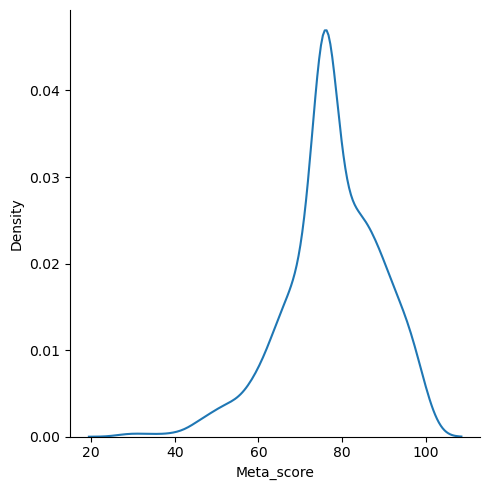

In [97]:
sns.displot(df['Meta_score'],kind='kde')

# **Reciprocal Transformation**
* To make the distribution more normally distributed


In [98]:
df['Meta_score'] = 1/df['Meta_score']

<AxesSubplot:xlabel='Meta_score'>

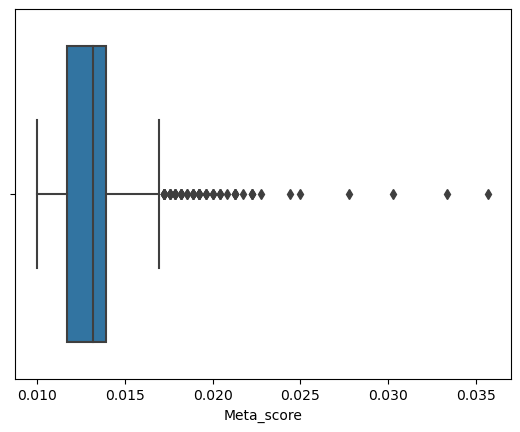

In [99]:
sns.boxplot(x=df['Meta_score'])

<AxesSubplot:xlabel='Meta_score'>

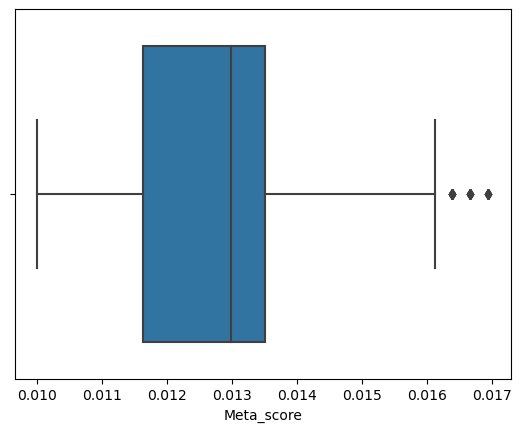

In [100]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df [field_name], 75)) ].index, inplace=True) 
    df.drop(df[df[field_name] < (np.percentile(df [field_name], 25) - iqr)].index, inplace=True)
drop_outliers (df, 'Meta_score')

sns.boxplot(x=df['Meta_score'])

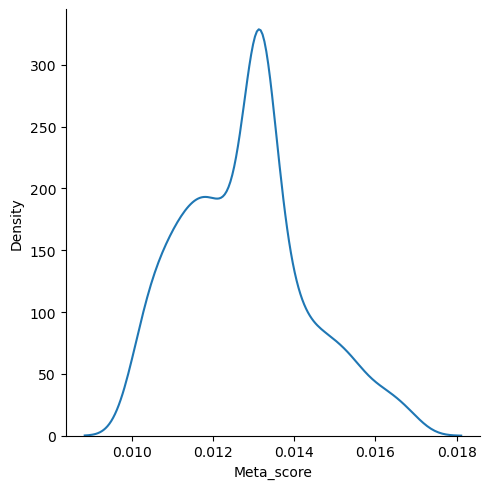

In [101]:

sns.displot(df['Meta_score'],kind='kde')

# **Correlation between the attributes**


In [102]:
df.corr()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Runtime,1.000000,0.253848,0.043160,0.179149,0.140581
IMDB_Rating,0.253848,1.000000,-0.187678,0.507302,0.088830
Meta_score,0.043160,-0.187678,1.000000,0.021526,0.055280
No_of_Votes,0.179149,0.507302,0.021526,1.000000,0.597268
Gross,0.140581,0.088830,0.055280,0.597268,1.000000


<AxesSubplot:>

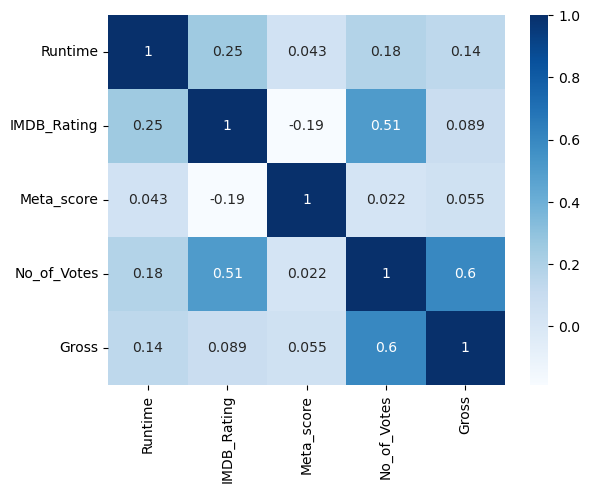

In [103]:
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

# Negative Correlations
    Meta_score -> No_of_votes, Gross
    No_of_votes -> Meta_score
    Gross -> Meta_score

# Positive Correlations
    IMDB_Rating -> Meta_score, No_of_votes, Gross
    Meta_score -> IMDB_Rating
    No_of_votes -> IMDB_Rating, Gross
    Gross -> IMDB_Rating, No_of_votes


In [104]:
# TOP 7 movies according to IMBD_Rating
top7_IMDB = df.sort_values('IMDB_Rating', ascending= False)[:7].reset_index(drop=True)
top7_IMDB.head(7)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross,Cast
0,The Shawshank Redemption,1994,A,142,Drama,9.3,0.012500,Frank Darabont,2343110,28341469,Tim Robbins Morgan Freeman Bob Gunton William ...
1,The Godfather,1972,A,175,"Crime, Drama",9.2,0.010000,Francis Ford Coppola,1620367,134966411,Marlon Brando Al Pacino James Caan Diane Keaton
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,0.011905,Christopher Nolan,2303232,534858444,Christian Bale Heath Ledger Aaron Eckhart Mich...
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,0.011111,Francis Ford Coppola,1129952,57300000,Al Pacino Robert De Niro Robert Duvall Diane K...
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,0.010417,Sidney Lumet,689845,4360000,Henry Fonda Lee J. Cobb Martin Balsam John Fie...
5,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,0.010638,Peter Jackson,1642758,377845905,Elijah Wood Viggo Mortensen Ian McKellen Orlan...
6,Pulp Fiction,1994,A,154,"Crime, Drama",8.9,0.010638,Quentin Tarantino,1826188,107928762,John Travolta Uma Thurman Samuel L. Jackson Br...


# **IMDB_Rating vs Meta_scores**

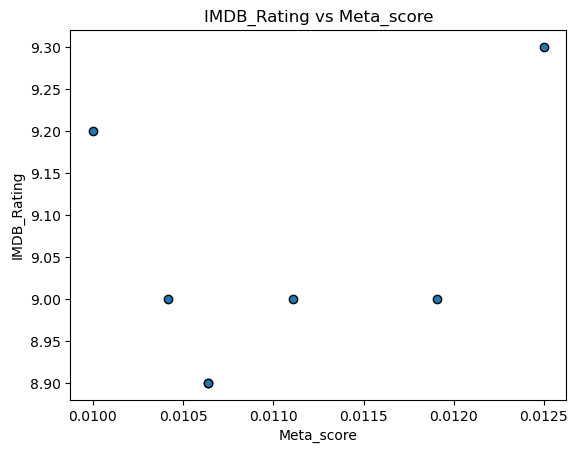

Text(0.5, 1.0, 'IMDB_Rating vs Meta_score')

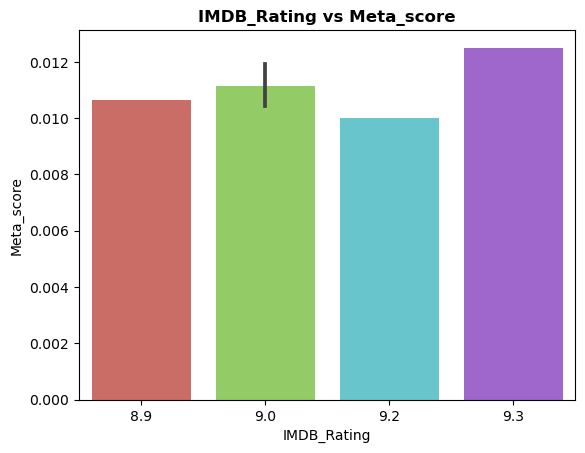

In [105]:
plt.scatter(x=top7_IMDB['Meta_score'], y=top7_IMDB['IMDB_Rating'], edgecolor='Black')
plt.ylabel('IMDB_Rating')
plt.xlabel('Meta_score')
plt.title('IMDB_Rating vs Meta_score')
plt.show()

# BAR REPRESENTATION
g=sns.barplot(y=top7_IMDB['Meta_score'][:7],x=top7_IMDB['IMDB_Rating'][:7], palette = 'hls')

g.set_title("IMDB_Rating vs Meta_score", weight = "bold")

# **IMDB_Rating vs No_of_Votes**

Text(0.5, 1.0, 'Top Voted Movies')

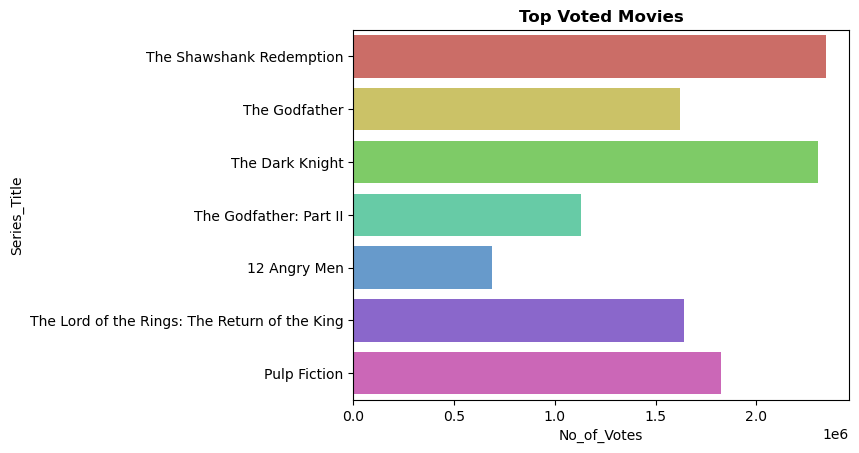

In [106]:
g=sns.barplot(x=top7_IMDB['No_of_Votes'][:7], y=top7_IMDB['Series_Title'][:7],palette = 'hls')
g.set_title("Top Voted Movies", weight = "bold")

In [107]:
top_voted = df.sort_values('No_of_Votes', ascending= False)[:7].reset_index(drop=True)
top_voted.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross,Cast
0,The Shawshank Redemption,1994,A,142,Drama,9.3,0.012500,Frank Darabont,2343110,28341469,Tim Robbins Morgan Freeman Bob Gunton William ...
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,0.011905,Christopher Nolan,2303232,534858444,Christian Bale Heath Ledger Aaron Eckhart Mich...
2,Inception,2010,UA,148,"Action, Adventure, Sci-Fi",8.8,0.013514,Christopher Nolan,2067042,292576195,Leonardo DiCaprio Joseph Gordon-Levitt Elliot ...
3,Fight Club,1999,A,139,Drama,8.8,0.015152,David Fincher,1854740,37030102,Brad Pitt Edward Norton Meat Loaf Zach Grenier
4,Pulp Fiction,1994,A,154,"Crime, Drama",8.9,0.010638,Quentin Tarantino,1826188,107928762,John Travolta Uma Thurman Samuel L. Jackson Br...


# **No_of_Votes vs director** 

Text(0.5, 1.0, 'No_of_Votes vs director')

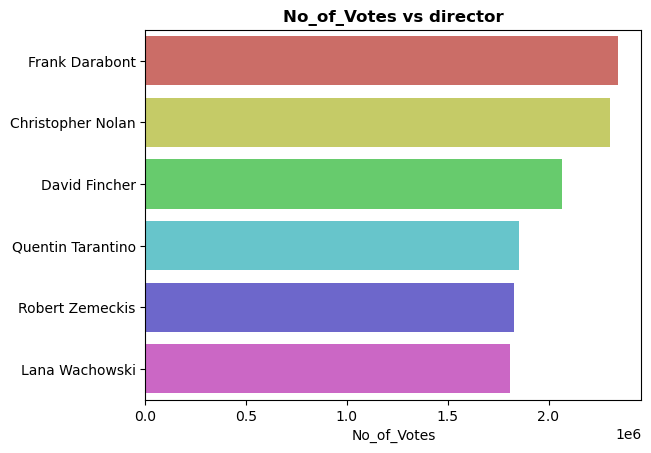

In [108]:
No_of_directors = top_voted['Director'].nunique()
gp=sns.barplot(x=top_voted['No_of_Votes'][:No_of_directors], y=top_voted['Director'].unique()[:No_of_directors], palette = 'hls')

gp.set_title("No_of_Votes vs director", weight = "bold")

# ** No_of_Votes vs Cast**

Text(0.5, 1.0, 'No_of_Votes vs Cast')

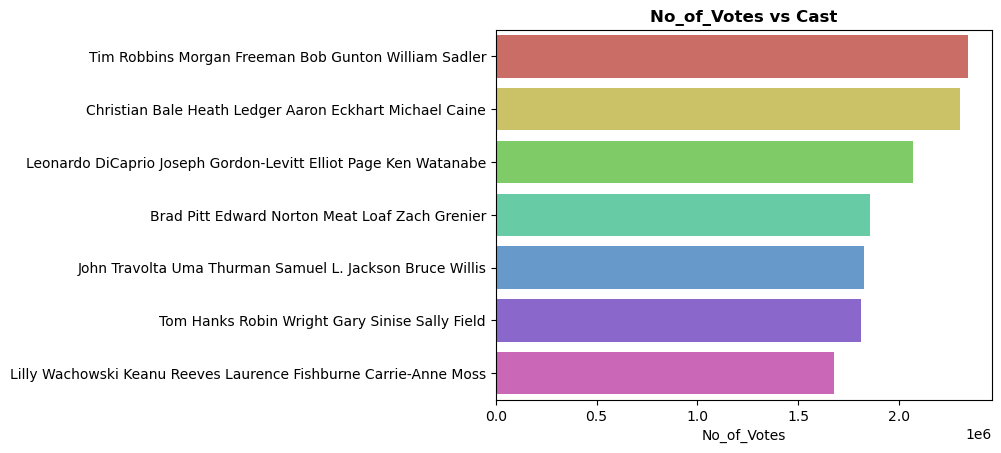

In [109]:
No_of_uniqueCast = top_voted['Cast'].nunique()
gp=sns.barplot(y=top_voted['Cast'].unique()[:No_of_uniqueCast],x=top_voted['No_of_Votes'][:No_of_uniqueCast], palette = 'hls')

gp.set_title("No_of_Votes vs Cast", weight = "bold")


# **Hypothesis Testing**
NULL Hypothesis: Assuming a the increase in Metascore leads same growth increase in Gross collection 

Alternative Hypothesis: There is no relationship between Metascore and gross.



In [110]:
#  Shapiro-Wilk Test [To see if the data is normally distributed]

from scipy.stats import shapiro

Sample = df['Meta_score'].sample(n=100, random_state=42)
stats, p = shapiro(Sample)
print(f'stats={stats}, p={p}')
if p > 0.05:
    print('Normal Distribution')
else:
    print('Not Normal Distribution')

stats=0.9556296467781067, p=0.001986395800486207
Not Normal Distribution


Since the data is not normally distributed. Alternative Hypothesis is accepted i.e there is no relationship between Meta_score and gross.

In [111]:
msm= df.groupby('Released_Year')['Meta_score'].agg(['mean'])
gm = df.groupby('Released_Year')['Gross'].agg(['mean'])


In [112]:
from scipy.stats import ttest_ind
ttest_ind(msm, gm , equal_var = False)


Ttest_indResult(statistic=array([-10.32241515]), pvalue=array([2.41880051e-17]))

# **RESULT**
The p value is 2.41880051e-17 which is smaller than 0.05. Therefore we reject the null hypothesis at 5% significance level, meaning that the high metascore does not mean that the movie will have high gross box-office collection.

# **Suggestion for next step analyzing**
* correlation between other features can be found out.
* Genre which preferred by the audience the most.
* outliers in other features can be dealt with.
* different hypothesis can be formulated.

# **About the dataset**
I think the dataset has all the attributes need to conduct the analysis. The features in the dataset can be used to find lot of insights and key findings by finding correlation between various features. However, it does contain null values and garbage values which requires to be dealt with. The dataset also have outliers which requires to be scaled. 